## About

This plot is a [barplot](https://python-graph-gallery.com/barplot/) with **custom annotations and circled arrows** showing the number of fiscal sponsorship of the top sponsors, according to the Fiscal Sponsorship Directory.

The chart was made for the **TidyTuesday** project by [Joseph B.](https://www.barbierjoseph.com/). 

Let's see what the final picture will look like:

![barplot with custom annotations](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-barplot-with-annotations-and-arrows.png?raw=true)

## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the chart and add customization features
- [pandas](https://python-graph-gallery.com/pandas/) is used to put the data into a dataframe
- `highlight_text` is used to add custom annotations to the chart

Install it with `pip install highlight_text`

And that's it!

In [15]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches  # for the arrows

from highlight_text import ax_text, fig_text

## Dataset

For this reproduction, we're going to retrieve the data directly from the [gallery's](https://python-graph-gallery.com) Github repo. This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.


In [2]:
# Open the dataset from Github
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/fiscal_sponsor_directory.csv"
url = '../../static/data/fiscal_sponsor_directory.csv'
df = pd.read_csv(url)

Our goal is to **semi-automaticaly detect** the main topic of each fiscal sponsor. After a bit of manual work, we can use the `project_types` column to create a `project` column with a reduced number of categories.

Then, we **sort the data** by the number of fiscal sponsorships and keep the top 15. We also compute a **few statistics** for the annotations at the end.

In [3]:
def cleanProjectTypes(text):
    text = str(text)
    text = text.lower()

    # get all content before |
    text = text.split('|')[0]

    if text[:5] == 'other':
        text = text[:5]

    elif 'arts and culture' in text:
        text = 'arts and culture'

    elif 'disaster relief' in text:
        text = text[:15]

    elif text[:15] == 'case management':
        text = 'health'

    elif 'economic development' in text:
        text = 'economic development'

    elif 'environment' in text:
        text = 'environment'

    elif 'ethnographic' in text:
        text = 'arts and culture'

    elif 'health' in text:
        text = 'health'

    elif 'social justice' in text:
        text = 'social justice'

    elif 'education' in text or 'youth' in text or 'child' in text:
        text = 'education'

    return text[0].upper() + text[1:]


# create the dataframe for the plot
n_topic = 15
best_contrib = df[['name', 'n_sponsored', 'project_types']].sort_values(by='n_sponsored', ascending=False)
best_contrib['project'] = best_contrib['project_types'].apply(cleanProjectTypes)
best_contrib.sort_values(by='n_sponsored', ascending=False, inplace=True)

# other stats
religion = best_contrib[best_contrib['project'] == 'Faith-based/religious']['n_sponsored'].sum()
religionPart = religion / best_contrib['n_sponsored'].sum() * 100

NHF = best_contrib[best_contrib['name'] == 'New Horizons Foundation Inc']['n_sponsored'].sum()
NHFPart = NHF / best_contrib[best_contrib['project_types'] == 'Faith-based/religious']['n_sponsored'].sum() * 100

art = best_contrib[best_contrib['project'] == 'Arts and culture']['n_sponsored'].sum()
artPart = art / best_contrib['n_sponsored'].sum() * 100

best_contrib = best_contrib.head(n_topic)
best_contrib.sort_values(by='n_sponsored', ascending=True, inplace=True)

## Basic barplot

Let's start with a simple version of the plot that uses the `barh()` function to create the barplot

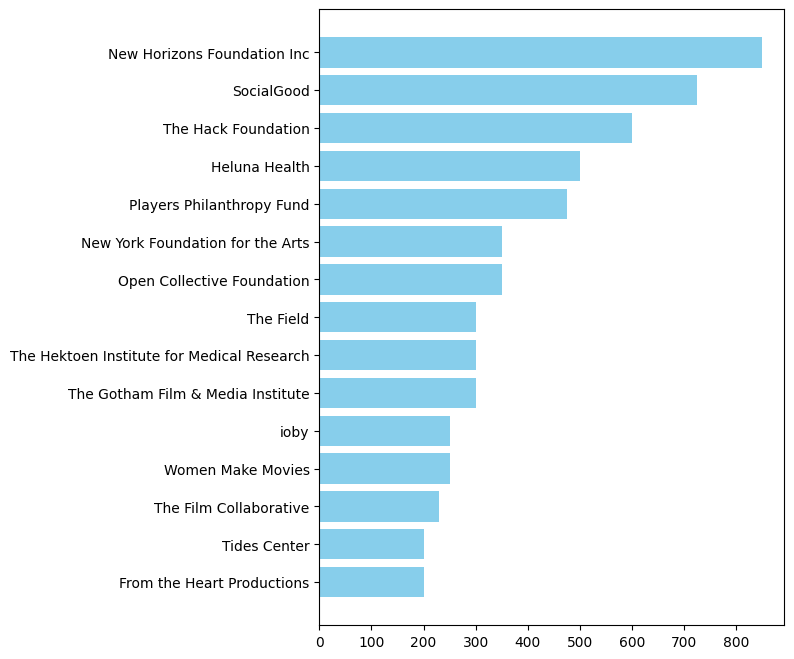

In [4]:
# initialize the figure
fig, ax = plt.subplots(figsize=(6,8))

# create the plot
ax.barh(best_contrib['name'], best_contrib['n_sponsored'], color='skyblue')

# display the plot
plt.show()

## Custom axis and first annotations

In this step, we add a few customizations to the plot:
- **remove the axis** with the `axis('off')` function
- **shift sponsors' names** so that they are inside the bars
- **add the number of fiscal sponsorships** on the right of the bars

We mainly use the `ax.text()` function to add the annotations, where the **positions** are determined by the number of fiscal sponsorships.

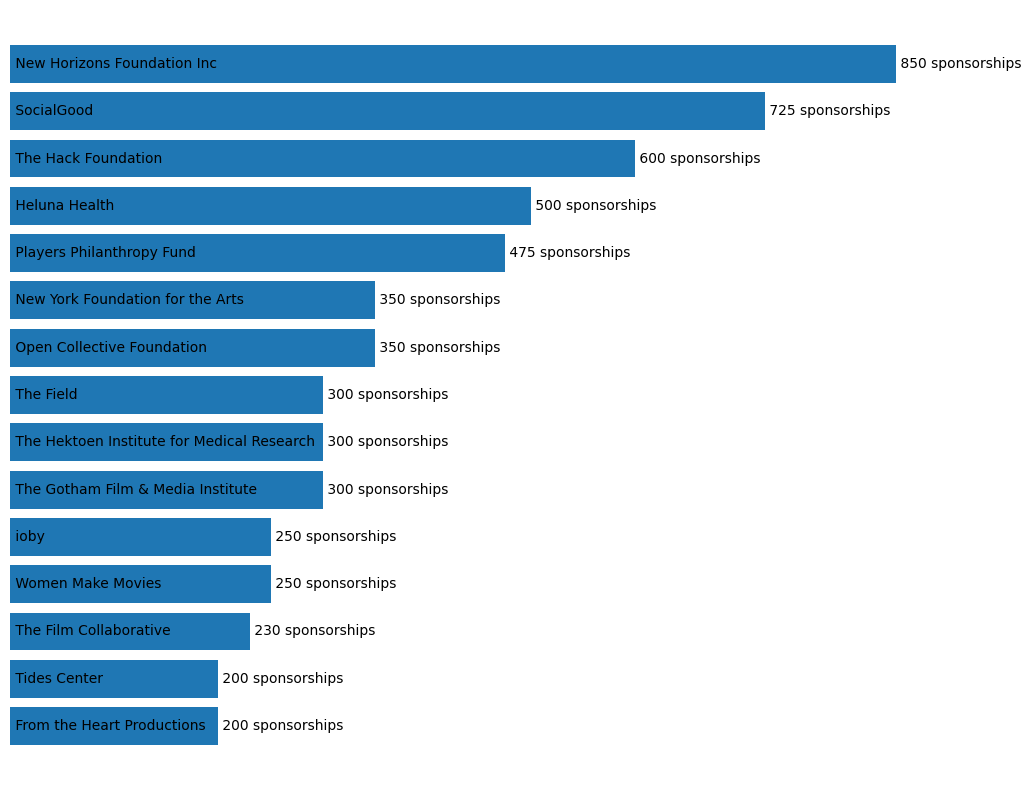

In [5]:
# initialize the figure
fig, ax = plt.subplots(figsize=(12, 10))

# remove axis
ax.axis('off')

# create the plot
ax.barh(best_contrib['name'], best_contrib['n_sponsored'])
for i, (value, name) in enumerate(zip(best_contrib['n_sponsored'], best_contrib['name'])):
    ax.text(x=1, y=i, s=f' {name}',
            ha='left', va='center', fontsize=10)
    ax.text(x=value, y=i, s=f' {int(value)} sponsorships',
            ha='left', va='center', fontsize=10)

# display the plot
plt.show()

## Custom colors

Ideally, each bar would have a color according to the `project` column. We can use the `c` argument of the `barh()` function to do that.

But before we create a color map, we need to create a dictionary that maps each `project` to a color.

We'll also **change the main theme** of the chart to a dark one. For this, we use:
- the `set_facecolor()` function to change the background color

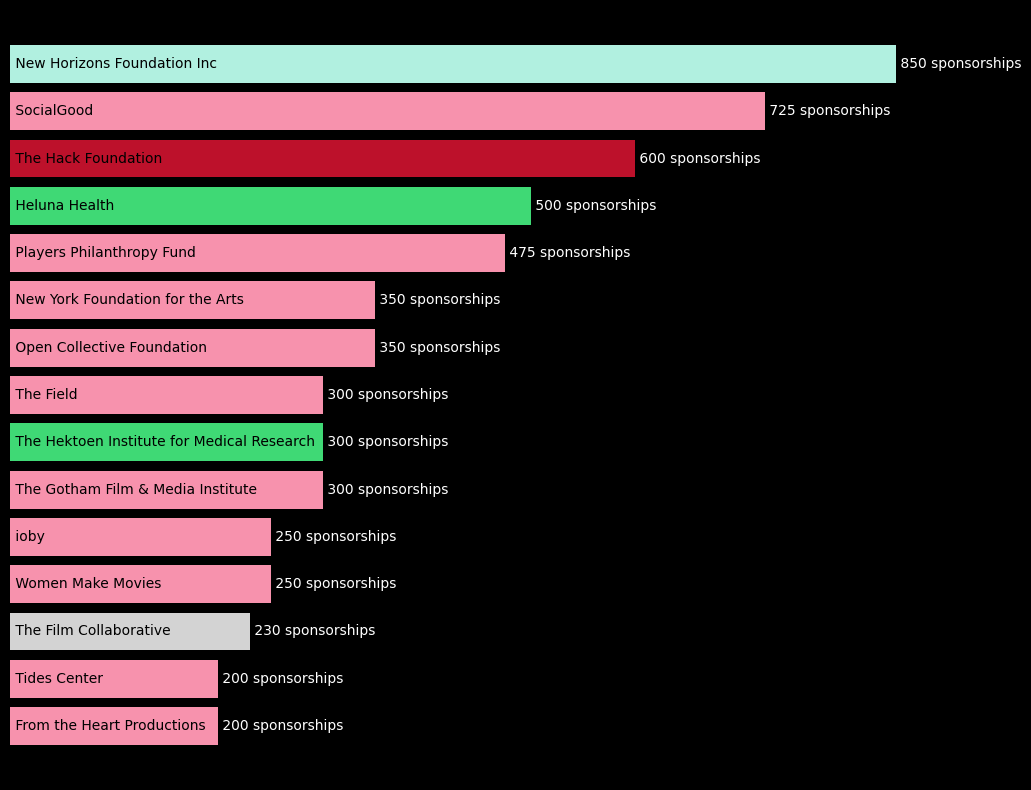

In [6]:
# initialize the figure
fig, ax = plt.subplots(figsize=(12, 10))

# remove axis
ax.axis('off')

# colors for the plot
colors = {
    'Arts and culture': '#f792ad',
    'Health': '#3fd975',
    'Environment': '#43f79a',
    'Bill paying': '#bd112b',
    'Other': 'lightgrey',
    'Faith-based/religious': '#b1f0e0',
}
c = [colors[category] for category in best_contrib['project']]
background_color = 'black'
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
text_color = 'white'

# create the plot
ax.barh(best_contrib['name'], best_contrib['n_sponsored'], color=c)
for i, (value, name) in enumerate(zip(best_contrib['n_sponsored'], best_contrib['name'])):
    ax.text(x=1, y=i, s=f' {name}',
            ha='left', va='center', fontsize=10, color='black')
    ax.text(x=value, y=i, s=f' {int(value)} sponsorships',
            ha='left', va='center', fontsize=10, color=text_color)

# display the plot
plt.show()

## Annotations

Now the last things missing are the arrows and the annotations. This is not the funniest part but it the part that will make the chart **really stand out**.

### Add a title
    
The title is added with the `text()` function and not the `title()` function because it gives us **more customization options**.
    
### Add a credit 
    
For the credit, we need the [highlight_text](https://github.com/znstrider/highlight_text) package that makes way easier customizing annotations! We use the `fig_text()` function, which is similar to `fig.text()` but with **more customization options**.
    
### Add arrows

We will create a custom arrow in Matplotlib by defining its style, size, and color, and then positions it on the figure using specified **tail and head coordinates**. It uses a `FancyArrowPatch` for flexible styling, including an **arc connection style**, and adds this arrow to the current plot's axes. This approach allows for detailed customization and highlighting within visual presentations, making it ideal for annotating or **drawing attention** to specific areas of a plot.

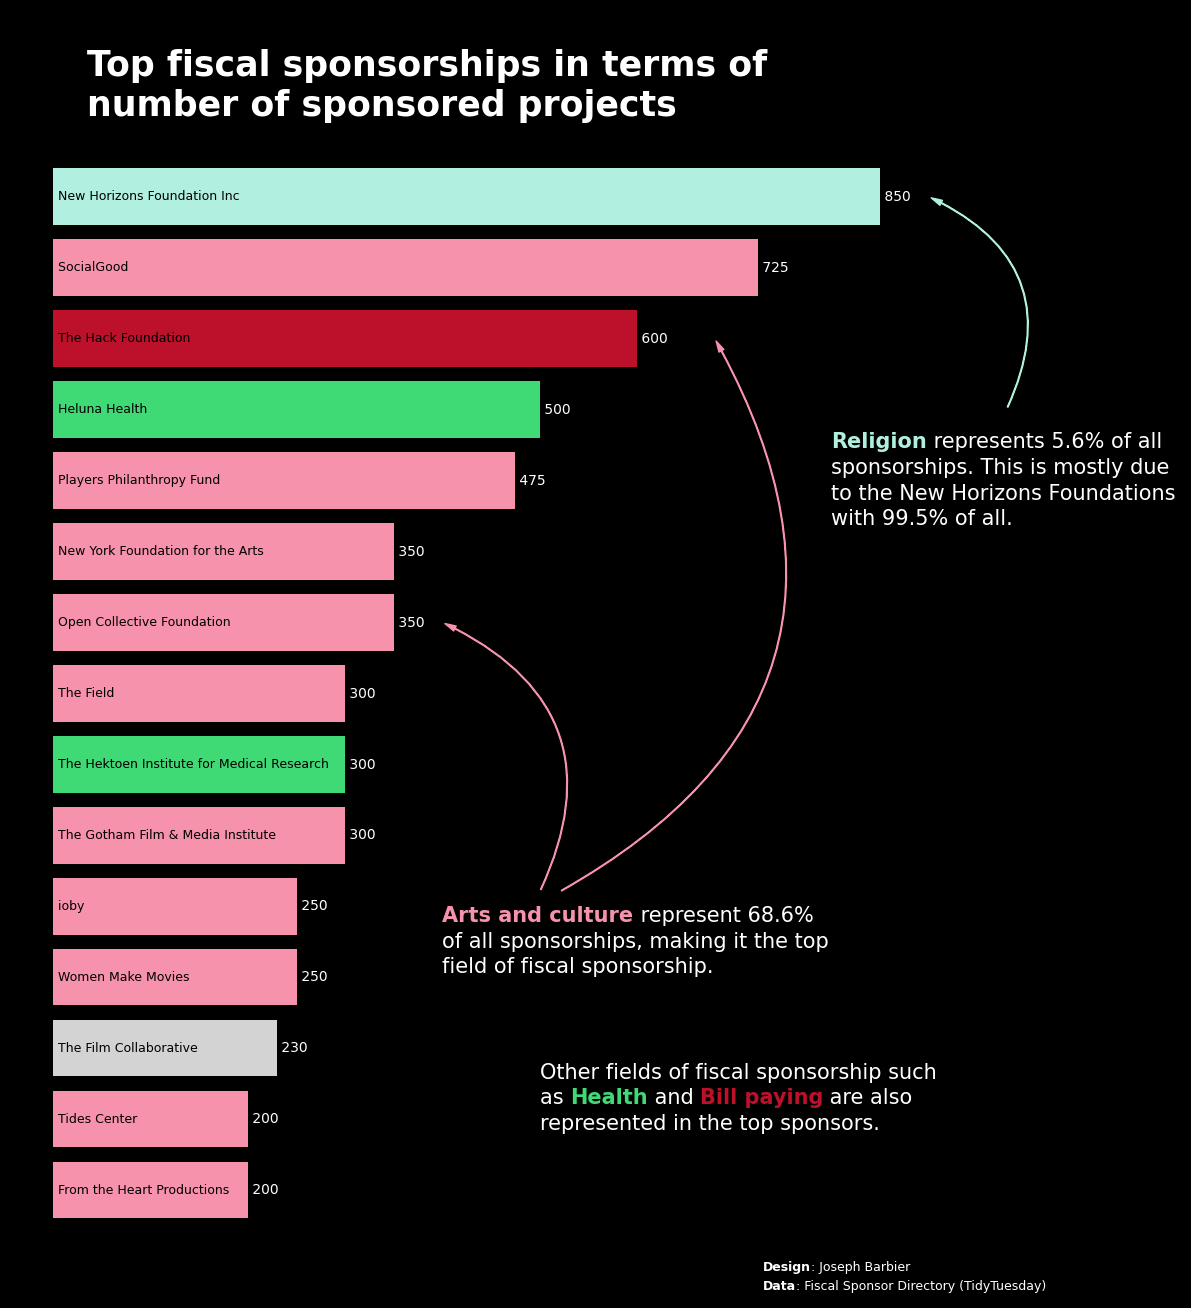

In [108]:
# initialize the figure
fig, ax = plt.subplots(figsize=(14, 15))

# remove axis
ax.axis('off')

# colors for the plot
colors = {
    'Arts and culture': '#f792ad',
    'Health': '#3fd975',
    'Environment': '#43f79a',
    'Bill paying': '#bd112b',
    'Other': 'lightgrey',
    'Faith-based/religious': '#b1f0e0',
}
c = [colors[category] for category in best_contrib['project']]
background_color = 'black'
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
text_color = 'white'

# create the plot
ax.barh(best_contrib['name'], best_contrib['n_sponsored'], color=c)
for i, (value, name) in enumerate(zip(best_contrib['n_sponsored'], best_contrib['name'])):
    ax.text(x=1, y=i, s=f' {name}',
            ha='left', va='center', fontsize=9, color='black')
    ax.text(x=value, y=i, s=f' {int(value)}',
            ha='left', va='center', fontsize=10, color=text_color)

# add a title
text = """
Top fiscal sponsorships in terms of
number of sponsored projects
"""
fig.text(x=0.18, y=0.9,
    s=text,
    fontsize=25, ha='left', va='center',
    weight='bold', color=text_color
)

# credits
text = "<Design>: Joseph Barbier\n<Data>: Fiscal Sponsor Directory (TidyTuesday)"
ax_text(x = 730, y = -1,
        s=text,
        color=text_color,
        fontsize=9,
        highlight_textprops=[{"fontweight": 'bold'},
                             {"fontweight": 'bold'}],
        ax=ax)

# arts annotation
text = "<Arts and culture> represent "
text += str(round(artPart,1))
text += "%\nof all sponsorships, making it the top\n"
text += "field of fiscal sponsorship."
ax_text(x=400, y=3.5,
    s=text, color = text_color,
    fontsize=15, ha='left', va='center',
    highlight_textprops=[{"color": colors['Arts and culture'],
                          "fontweight": 'bold'}]
)
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color=colors['Arts and culture'])
head_position = (680, 12)
tail_position = (520, 4.2)
a = patches.FancyArrowPatch(tail_position, head_position,
                              connectionstyle="arc3,rad=.5", **kw)
plt.gca().add_patch(a)
head_position = (400, 8)
tail_position = (500, 4.2)
a = patches.FancyArrowPatch(tail_position, head_position,
                              connectionstyle="arc3,rad=.5", **kw)
plt.gca().add_patch(a)



# religions annotation
text = "<Religion> represents " +  str(round(religionPart,1)) + "% of all"
text += "\nsponsorships. This is mostly due\nto the New Horizons "
text += f"Foundations\nwith {NHFPart:.1f}% of all."
ax_text(x=800, y=10,
    s=text,
    fontsize=15, ha='left', va='center',
    color=text_color,
    highlight_textprops=[{"color": colors['Faith-based/religious'],
                         "fontweight": 'bold'}]
)
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color=colors['Faith-based/religious'])
head_position = (900, 14)
tail_position = (980, 11)
a = patches.FancyArrowPatch(tail_position, head_position,
                              connectionstyle="arc3,rad=.5", **kw)
plt.gca().add_patch(a)


# other annotations below
text = "Other fields of fiscal sponsorship such\nas <Health> and <Bill paying>"
text += " are also\nrepresented in the top sponsors."
ax_text(x = 500, y = 1.8,
        s=text,
        color=text_color,
        fontsize=15,
        highlight_textprops=[{"color": colors['Health'], "fontweight": 'bold'},
                             {"color": colors['Bill paying'], "fontweight": 'bold'}],
        ax=ax)

# display the plot
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
xrange = xmax - xmin
yrange = ymax - ymin
ax.set_xlim(xmin - 0.05*xrange, xmax + 0.2*xrange)
fig.savefig('../../../test.png', dpi=300, bbox_inches='tight')
plt.show()

## Going further

This article explains how to reproduce a [barplot](https://python-graph-gallery.com/barplot/) with **custom annotations and circled arrows** showing the number of fiscal sponsorship of the top sponsors, according to the Fiscal Sponsorship Directory.

For more examples of **advanced customization**, check out [how to create a mirror barplot](https://python-graph-gallery.com/web-ordered-mirror-barplot/). Also, you might be interested in creating a [circular barplot](https://python-graph-gallery.com/web-circular-barplot-with-matplotlib/).